In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
from sklearn.cluster import KMeans


In [48]:
raw_data = pd.read_csv("Categorical-Country.csv")
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [49]:
data = raw_data.copy()
data["continent"] = data["continent"].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


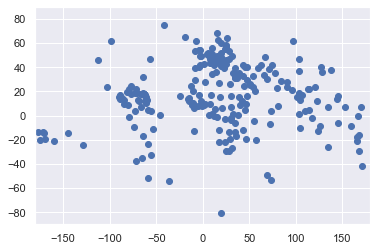

In [50]:
plt.scatter(data["Longitude"],data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [51]:
x = data.iloc[:,3:]
x.head()

,continent
0,0
1,2
2,3
3,0
4,1


In [52]:
kmeans = KMeans(4)

In [53]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
clusters = kmeans.fit_predict(x)
clusters

array([1, 3, 0, 1, 1, 1, 1, 3, 0, 3, 2, 2, 2, 2, 1, 2, 1, 3, 0, 1, 0, 0,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 3, 3, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 0, 3, 2, 1, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3, 3, 1, 3, 1, 1, 1, 3,
       3, 3, 3, 0, 3, 3, 2, 1, 3, 1, 3, 3, 3, 0, 0, 1, 1, 3, 0, 1, 1, 1,
       3, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 3, 1, 3, 2, 0, 0, 1, 2, 0, 3,
       0, 2, 0, 2, 0, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 0, 3, 2, 2, 1, 1,
       3, 1, 0, 3, 2, 3, 1, 1, 0, 0, 3, 0, 0, 0, 3, 2, 2, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 3, 1, 0, 0, 3, 3, 3, 3, 2, 1, 0,
       3, 3, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1, 1, 3, 2, 2, 2, 3, 0, 0, 0])

In [55]:
clustered_data = data.copy()
clustered_data["clusters"] = clusters
clustered_data.head()

,name,Longitude,Latitude,continent,clusters
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,0
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,1,1


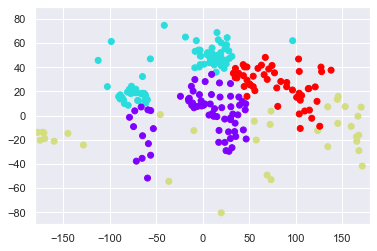

In [56]:
plt.scatter(data["Longitude"],data["Latitude"],c=clustered_data["clusters"],cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()